In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import standarizing

In [2]:
df = pd.read_csv('train_data.csv', encoding='utf-8', error_bad_lines=False)
df.head()

b'Skipping line 5856: expected 40 fields, saw 70\nSkipping line 7939: expected 40 fields, saw 49\n'


,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,VALTYPE,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA,New Georeferenced Column
0,1001791101,1,179,1101,NaN,155 FRANKLIN ST LLC,RK,4,0,0,...,AC-TR,MANHATTAN,40.719232,-74.008095,101.0,1.0,33.0,1002013.0,SoHo-TriBeCa-Civic Center-Little Italy,POINT (-74.008095 40.719232)
1,1000163436,1,16,3436,NaN,BROADLAR LLC,R4,2,0,0,...,AC-TR,MANHATTAN,40.709270,-74.016487,101.0,1.0,31704.0,1000053.0,Battery Park City-Lower Manhattan,POINT (-74.016487 40.70927)
2,1000761255,1,76,1255,NaN,"HAM, RICHARD",R4,2,0,0,...,AC-TR,MANHATTAN,40.708006,-74.006164,101.0,1.0,1502.0,1087867.0,Battery Park City-Lower Manhattan,POINT (-74.006164 40.708006)
3,1000161179,1,16,1179,NaN,"SHIM, HAE JIN",R4,2,0,0,...,AC-TR,MANHATTAN,40.709506,-74.018002,101.0,1.0,31704.0,1000061.0,Battery Park City-Lower Manhattan,POINT (-74.018002 40.709506)
4,1001751526,1,175,1526,NaN,BRIT GIRL LLC,R4,2,0,0,...,AC-TR,MANHATTAN,40.718024,-74.003903,101.0,1.0,33.0,1001937.0,SoHo-TriBeCa-Civic Center-Little Italy,POINT (-74.003903 40.718024)


In [3]:
df['FULLVAL'].mean()

1335495.8509961492

In [4]:
df['FULLVAL'].std()

9803228.325752428

In [5]:
df['FULLVAL'].min()

0

In [6]:
df['FULLVAL'].max()

462001000

In [7]:
(df['FULLVAL'] > 10_000_000).sum()

135

In [8]:
(df['FULLVAL'] <= 0).sum()

226

In [9]:
((df['FULLVAL'] <= 100_000) & (df['FULLVAL'] > 0)).sum()

668

In [10]:
length = len(df)
length

11946

In [11]:
y_log = np.log(df['FULLVAL'])
y_log[y_log < -3] = 0
(y_log == 0).sum()

C:\Users\Lasze\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


226

(array([2.260e+02, 0.000e+00, 8.000e+00, 5.300e+01, 1.340e+02, 7.810e+02,
        9.048e+03, 1.535e+03, 1.320e+02, 2.900e+01]),
 array([ 0.        ,  1.99510776,  3.99021552,  5.98532328,  7.98043105,
         9.97553881, 11.97064657, 13.96575433, 15.96086209, 17.95596985,
        19.95107761]),
 <BarContainer object of 10 artists>)

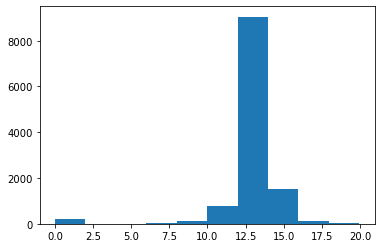

In [12]:
plt.hist(y_log)

(array([1.191e+04, 1.600e+01, 7.000e+00, 4.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([0.000000e+00, 4.620010e+07, 9.240020e+07, 1.386003e+08,
        1.848004e+08, 2.310005e+08, 2.772006e+08, 3.234007e+08,
        3.696008e+08, 4.158009e+08, 4.620010e+08]),
 <BarContainer object of 10 artists>)

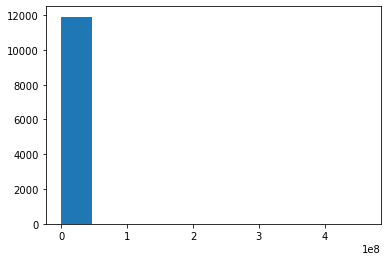

In [13]:
plt.hist(df['FULLVAL'])

In [14]:
df['FULLVAL']

0        3463000
1         247784
2         173338
3         184550
4         559937
          ...   
11941     407000
11942     244285
11943     298000
11944     459000
11945     557000
Name: FULLVAL, Length: 11946, dtype: int64

BBLE -> 1.0 (11946 uniques) [1, 1, 1, 1, 1] [1, 1, 1, 1, 1]


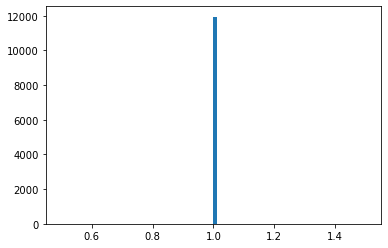

OWNER -> 0.9238238741001172 (11036 uniques) [71, 53, 34, 29, 22] [1, 1, 1, 1, 1]


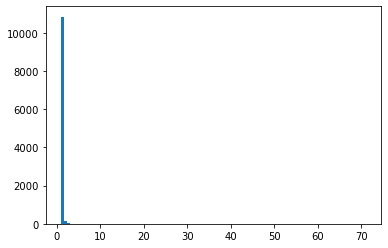

STADDR -> 0.8150008371002846 (9736 uniques) [49, 46, 43, 41, 41] [1, 1, 1, 1, 1]


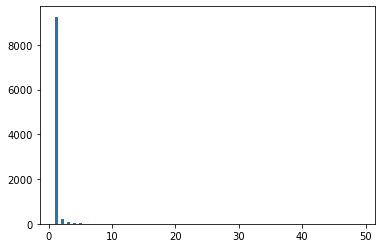

New Georeferenced Column -> 0.7874602377364809 (9407 uniques) [49, 46, 43, 41, 41] [1, 1, 1, 1, 1]


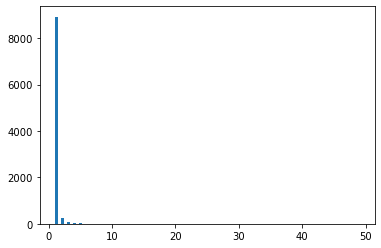

BIN -> 0.7701322618449691 (9200 uniques) [116, 49, 46, 43, 42] [1, 1, 1, 1, 1]


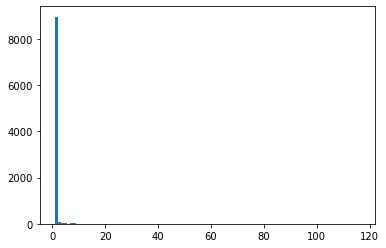

Latitude -> 0.7621798091411351 (9105 uniques) [49, 46, 43, 41, 41] [1, 1, 1, 1, 1]


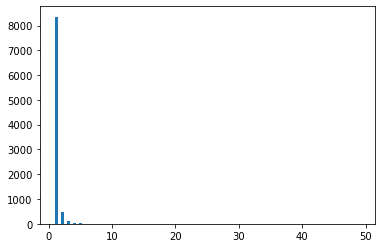

Longitude -> 0.7533902561526871 (9000 uniques) [49, 46, 43, 41, 41] [1, 1, 1, 1, 1]


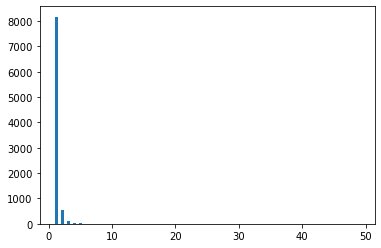

AVLAND -> 0.6347731458228696 (7583 uniques) [226, 26, 25, 21, 19] [1, 1, 1, 1, 1]


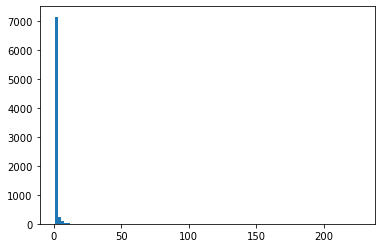

AVTOT -> 0.565796082370668 (6759 uniques) [226, 28, 27, 25, 24] [1, 1, 1, 1, 1]


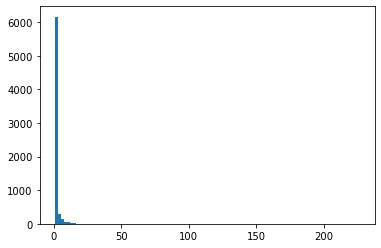

FULLVAL -> 0.39829231541938726 (4758 uniques) [226, 33, 29, 28, 26] [1, 1, 1, 1, 1]


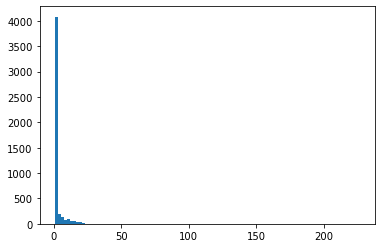

AVTOT2 -> 0.27473631341034654 (3282 uniques) [17, 15, 10, 9, 9] [1, 1, 1, 1, 1]


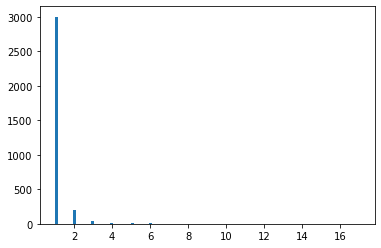

AVLAND2 -> 0.22970031809810815 (2744 uniques) [17, 17, 16, 16, 14] [1, 1, 1, 1, 1]


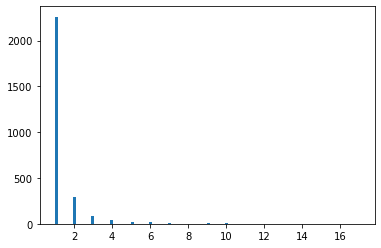

EXTOT -> 0.19387242591662482 (2316 uniques) [5953, 2365, 425, 261, 103] [1, 1, 1, 1, 1]


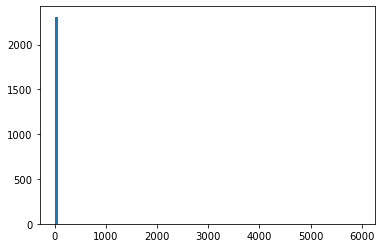

BLOCK -> 0.16993135777666166 (2030 uniques) [403, 380, 91, 79, 72] [1, 1, 1, 1, 1]


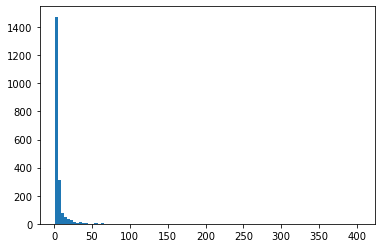

LOT -> 0.14557173949439142 (1739 uniques) [214, 121, 113, 112, 106] [1, 1, 1, 1, 1]


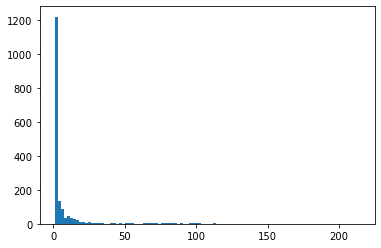

EXLAND -> 0.1392934873597857 (1664 uniques) [6733, 2200, 449, 208, 107] [1, 1, 1, 1, 1]


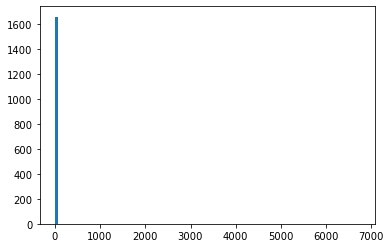

EXTOT2 -> 0.124644232379039 (1489 uniques) [79, 18, 15, 14, 12] [1, 1, 1, 1, 1]


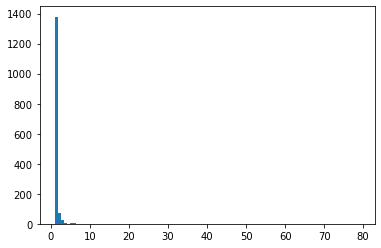

EXLAND2 -> 0.07575757575757576 (905 uniques) [88, 16, 15, 8, 5] [1, 1, 1, 1, 1]


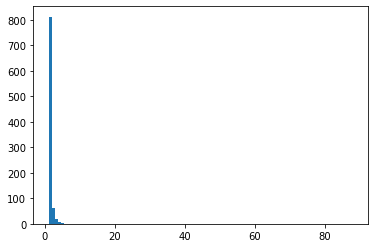

LTDEPTH -> 0.030219320274568893 (361 uniques) [3866, 2820, 250, 221, 212] [1, 1, 1, 1, 1]


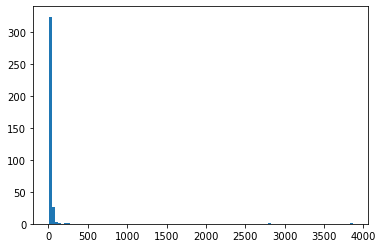

LTFRONT -> 0.028963669847647748 (346 uniques) [2425, 1049, 1030, 856, 353] [1, 1, 1, 1, 1]


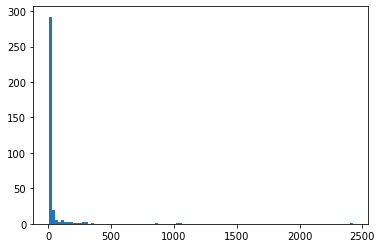

Census Tract -> 0.018667336346894357 (223 uniques) [585, 460, 429, 361, 358] [1, 1, 1, 1, 1]


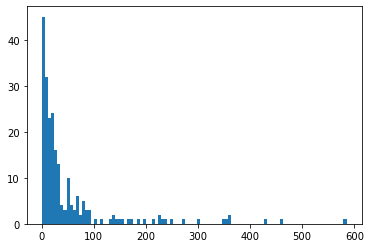

BLDFRONT -> 0.017997656119203082 (215 uniques) [3040, 1316, 764, 656, 619] [1, 1, 1, 1, 1]


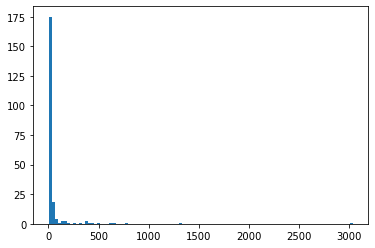

BLDDEPTH -> 0.01791394609074167 (214 uniques) [3031, 481, 427, 373, 370] [1, 1, 1, 1, 1]


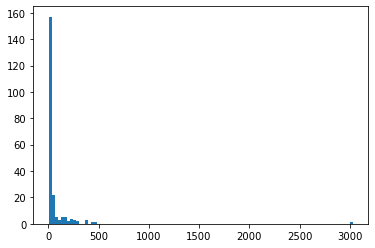

BLDGCL -> 0.0129750544115185 (155 uniques) [1877, 1290, 1162, 1031, 822] [1, 1, 1, 1, 1]


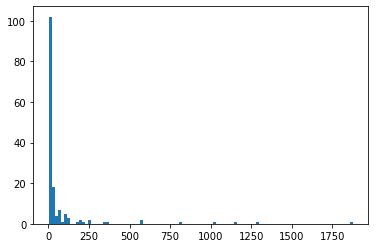

EXCD1 -> 0.005943412020760087 (71 uniques) [3352, 485, 400, 221, 219] [1, 1, 1, 1, 1]


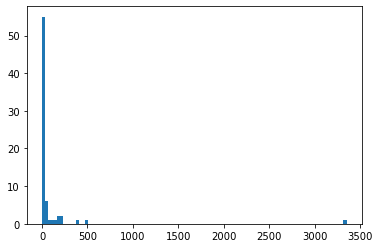

STORIES -> 0.005357441821530219 (64 uniques) [4258, 1453, 1418, 442, 393] [1, 1, 1, 1, 1]


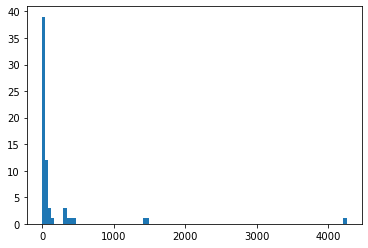

POSTCODE -> 0.004436631508454713 (53 uniques) [3309, 697, 545, 440, 407] [1, 1, 1, 1, 1]


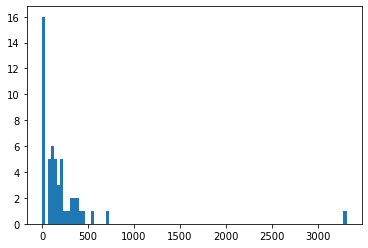

NTA -> 0.0037669512807634357 (45 uniques) [1484, 1463, 979, 851, 708] [2, 1, 1, 1, 1]


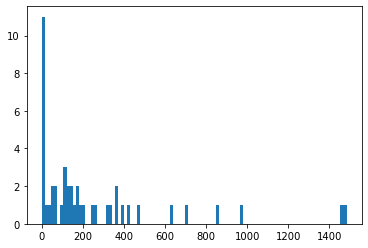

Community Board -> 0.0019253306546124225 (23 uniques) [2947, 1663, 869, 851, 826] [34, 7, 5, 1, 1]


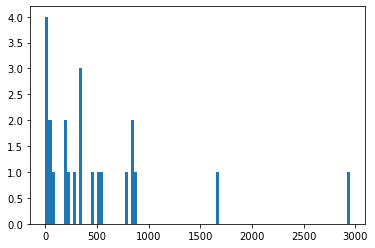

Council District -> 0.0017579105976896032 (21 uniques) [2146, 1765, 1123, 1020, 859] [85, 71, 20, 6, 4]


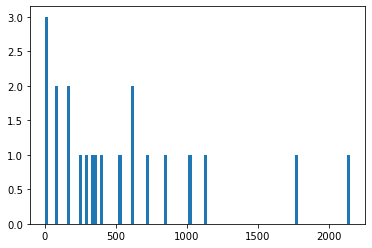

EXCD2 -> 0.0009208103130755065 (11 uniques) [562, 96, 45, 35, 13] [5, 2, 1, 1, 1]


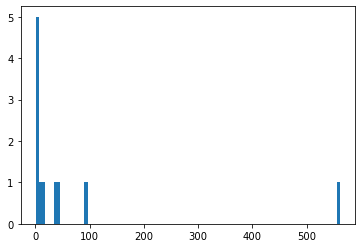

TAXCLASS -> 0.0008371002846140967 (10 uniques) [5963, 2599, 1337, 1162, 259] [216, 198, 133, 73, 6]


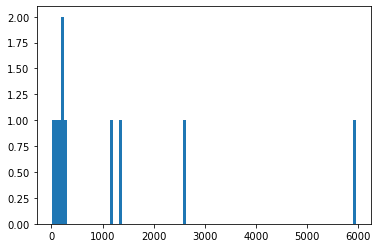

EXMPTCL -> 0.0007533902561526871 (9 uniques) [114, 57, 4, 4, 4] [4, 3, 3, 2, 1]


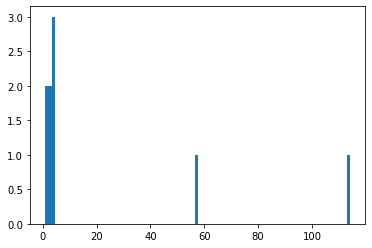

EASEMENT -> 0.0005022601707684581 (6 uniques) [100, 15, 4, 4, 2] [15, 4, 4, 2, 1]


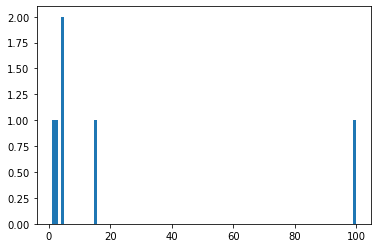

Borough -> 0.00041855014230704837 (5 uniques) [3775, 2065, 2060, 1808, 1806] [3775, 2065, 2060, 1808, 1806]


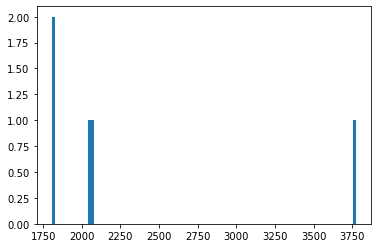

BORO -> 0.00041855014230704837 (5 uniques) [4004, 2111, 2082, 1912, 1837] [4004, 2111, 2082, 1912, 1837]


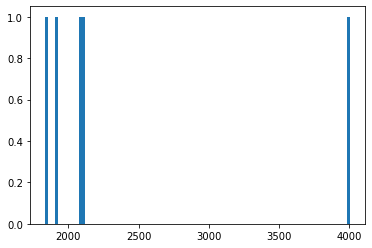

EXT -> 0.00025113008538422905 (3 uniques) [2441, 344, 197] [2441, 344, 197]


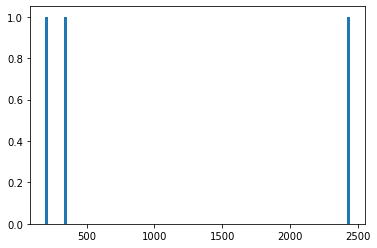

YEAR -> 0.00016742005692281934 (2 uniques) [6086, 5860] [6086, 5860]


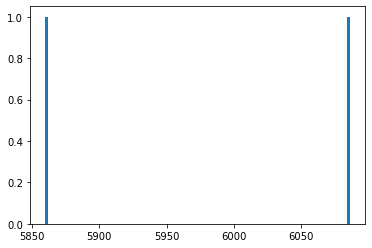

VALTYPE -> 8.371002846140967e-05 (1 uniques) [11946] [11946]


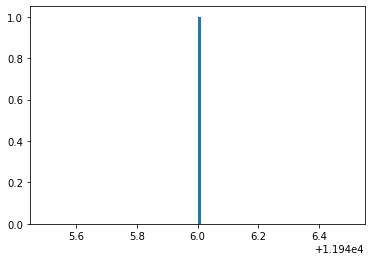

PERIOD -> 8.371002846140967e-05 (1 uniques) [11946] [11946]


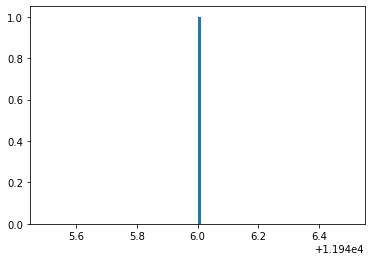

In [15]:
l = [(column, df[column].nunique()) for column in df.columns]
l = reversed(sorted(l, key=lambda x: x[1]))
for x in l:
    cnt = list(reversed(sorted(df.groupby(x[0])['BBLE'].nunique())))
    print(x[0], '->', x[1] / length, f'({x[1]} uniques)', cnt[:5], cnt[-5:])
    plt.hist(cnt, bins=100)
    plt.show()

In [16]:
owner_cnt = df.groupby('OWNER')['BBLE'].nunique()
bin_cnt = df.groupby('BIN')['BBLE'].nunique()
census_cnt = df.groupby('Census Tract')['BBLE'].nunique()
bldgcl_cnt = df.groupby('BLDGCL')['BBLE'].nunique()
excd1_cnt = df.groupby('EXCD1')['BBLE'].nunique()
nta_cnt = df.groupby('NTA')['BBLE'].nunique()
community_board_cnt = df.groupby('Community Board')['BBLE'].nunique()
#excd2_cnt = df.groupby('EXCD2')['BBLE'].nunique()

In [17]:
df['OWNER_RICHNESS'] = 'poor'
df['BIN_POPULARNESS'] = 'not popular'
df.loc[df['OWNER'].isin(owner_cnt[owner_cnt > 10].index), 'OWNER_RICHNESS'] = 'very rich'
df.loc[df['OWNER'].isin(owner_cnt[(owner_cnt > 1) & (owner_cnt <= 10)].index), 'OWNER_RICHNESS'] = 'rich'
df.loc[df['BIN'].isin(bin_cnt[bin_cnt > 10].index), 'BIN_POPULARNESS'] = 'very popular'
df.loc[df['BIN'].isin(bin_cnt[(bin_cnt > 1) & (bin_cnt <= 10)].index), 'BIN_POPULARNESS'] = 'popular'
df.loc[df['Census Tract'].isin(census_cnt[census_cnt <= 10].index), 'Census Tract'] = 'other category'
df.loc[df['Census Tract'] != 'other', 'Census Tract'] = df.loc[df['Census Tract'] != 'other', 'Census Tract'].astype(str) + ' category'
df.loc[df['BLDGCL'].isin(bldgcl_cnt[bldgcl_cnt <= 10].index), 'BLDGCL'] = 'OTHER_BUILDING_CLASS'
df.loc[df['EXCD1'].isin(excd1_cnt[excd1_cnt <= 10].index), 'EXCD1'] = 'other'
df.loc[df['EXCD1'] != 'other', 'EXCD1'] = df.loc[df['EXCD1'] != 'other', 'EXCD1'].astype(str) + 'category'
df.loc[df['NTA'].isin(nta_cnt[nta_cnt <= 10].index), 'NTA'] = 'OTHER_NTA'
df.loc[df['Community Board'].isin(community_board_cnt[community_board_cnt <= 10].index), 'Community Board'] = 'other'
df.loc[df['Community Board'] != 'other', 'Community Board'] = df.loc[df['Community Board'] != 'other', 'Community Board'].astype(str) + ' category'
df.loc[:, 'Council District'] = df.loc[:, 'Council District'].astype(str) + ' category'
#df.loc[df['EXCD2'].isin(excd2_cnt[excd2_cnt <= 10].index), 'EXCD2'] = 'other'
#df.loc[df['EXCD2'] != 'other', 'EXCD2'] = df.loc[df['EXCD2'] != 'other', 'EXCD2'].astype(str) + ' category'
df['TAXCLASS'] = df['TAXCLASS'].astype(str)


df.loc[df['EXTOT'] == 0, 'EXTOT'] = np.nan
df.loc[df['EXLAND'] == 0, 'EXLAND'] = np.nan
df.loc[df['LTDEPTH'] == 0, 'LTDEPTH'] = np.nan
df.loc[df['LTFRONT'] == 0, 'LTFRONT'] = np.nan
df.loc[df['BLDFRONT'] == 0, 'BLDFRONT'] = np.nan
df.loc[df['BLDDEPTH'] == 0, 'BLDDEPTH'] = np.nan

In [18]:
df[['AVLAND', 'AVTOT', 'AVLAND2', 'AVTOT2', 'EXTOT', 'EXTOT2', 'EXLAND', 'EXLAND2']]

,AVLAND,AVTOT,AVLAND2,AVTOT2,EXTOT,EXTOT2,EXLAND,EXLAND2
0,118035,1558350,118035.0,1469160.0,NaN,NaN,NaN,NaN
1,17301,111503,17301.0,100640.0,111503.0,100640.0,17301.0,17301.0
2,11304,78002,11304.0,67154.0,NaN,NaN,NaN,NaN
3,14081,83048,14081.0,76467.0,83048.0,76467.0,14081.0,14081.0
4,10126,251972,10126.0,208110.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
11941,5413,21814,NaN,NaN,NaN,NaN,NaN,NaN
11942,1083,11851,NaN,NaN,1470.0,NaN,1083.0,NaN
11943,8443,16663,NaN,NaN,1470.0,NaN,1470.0,NaN
11944,9813,25164,NaN,NaN,1470.0,NaN,1470.0,NaN


In [19]:
df['Census Tract']

0           33.0 category
1        31704.0 category
2         1502.0 category
3        31704.0 category
4           33.0 category
               ...       
11941    30302.0 category
11942    30302.0 category
11943    30302.0 category
11944    27302.0 category
11945    27302.0 category
Name: Census Tract, Length: 11946, dtype: object

In [20]:
df = df.drop(columns='BBLE') # indices (every unique)
df = df.drop(columns='VALTYPE') # only 1 unique values
df = df.drop(columns='OWNER') # Owner replaced by OWNER_RICHNESS (could also get sth from owner name)
df = df.drop(columns='STADDR') # Address not needed - we already use long. + lat.
df = df.drop(columns='New Georeferenced Column') # Point not needed - we already use long. + lat.
df = df.drop(columns='BIN') # BIN replaced by BIN_POPULARNESS, BIN probably not needed - we already use long. + lat.
#AVLAND and AVTOT - wazne wartosci liczbowe
#FULLVAL - y do przewidzenia
#AVLAND2  and AVTOT2 - wazne wartosci liczbowe
#EXTOT, EXTOT2, EXLAND and EXLAND2 - wazne wartosci liczbowe
df = df.drop(columns='BLOCK') # BLOCK not needed - we already use long. + lat.
df = df.drop(columns='LOT') # LOT number is used for taxes (either do some mapping to taxation or drop it)
# LTDEPTH and LTFRONT - chyba to wielkości posesji
# BLDFRONT, BLDDEPTH - wielkości budynku

# STORIES - liczba pięter
df = df.drop(columns='POSTCODE') # POSTCODE not needed - we already use long. + lat. 
# Community Board - kategoryczna zmienna 
# EXCD2 - exception code 2, kategoryczna zmienna
df = df.drop(columns='EXCD2') # EXCD2 not needed - too many nans.
df = df.drop(columns='EXMPTCL') # EXMPTCL not needed - too many nans.
df = df.drop(columns='EASEMENT') # fajny opis ale tylko 120 non-nan wiec out.
# Borough - dzielnica, kategoryczne
df = df.drop(columns='BORO') # PRAWIE to samo co Borough.
# EXT - Extension indicator, kategoryczne
df = df.drop(columns='PERIOD') # Tylko jedno unique value.

In [21]:
df.to_csv('cleaned.csv', index=0)

In [22]:
df = pd.read_csv('cleaned.csv')
df.head()

,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,...,YEAR,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,OWNER_RICHNESS,BIN_POPULARNESS
0,RK,4,NaN,NaN,NaN,6.0,3463000,118035,1558350,NaN,...,2018/19,MANHATTAN,40.719232,-74.008095,101.0 category,1.0 category,33.0 category,SoHo-TriBeCa-Civic Center-Little Italy,poor,not popular
1,R4,2,NaN,NaN,NaN,23.0,247784,17301,111503,17301.0,...,2018/19,MANHATTAN,40.709270,-74.016487,101.0 category,1.0 category,31704.0 category,Battery Park City-Lower Manhattan,poor,very popular
2,R4,2,NaN,NaN,NaN,25.0,173338,11304,78002,NaN,...,2018/19,MANHATTAN,40.708006,-74.006164,101.0 category,1.0 category,1502.0 category,Battery Park City-Lower Manhattan,poor,very popular
3,R4,2,NaN,NaN,NaN,27.0,184550,14081,83048,14081.0,...,2018/19,MANHATTAN,40.709506,-74.018002,101.0 category,1.0 category,31704.0 category,Battery Park City-Lower Manhattan,poor,very popular
4,R4,2,NaN,NaN,NaN,19.0,559937,10126,251972,NaN,...,2018/19,MANHATTAN,40.718024,-74.003903,101.0 category,1.0 category,33.0 category,SoHo-TriBeCa-Civic Center-Little Italy,poor,popular


In [23]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
for column in df.columns:
    mask = pd.isna(df[column])
    s = mask.sum()
    if s > 0:
        if column in numerical_columns:
            m = df[column].mean()
            if s > 10:
                df[str(column) + '_WAS_NAN'] = 0
                df.loc[mask, str(column) + '_WAS_NAN'] = 1
        else:
            m = 'nan_val'
        df[column] = df[column].fillna(m)

LTFRONT


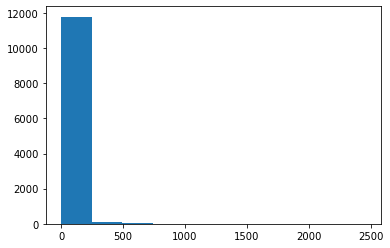

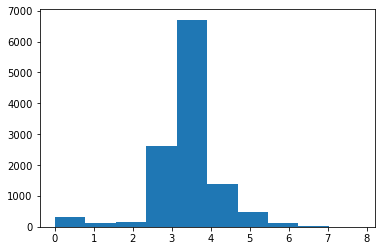

LTDEPTH


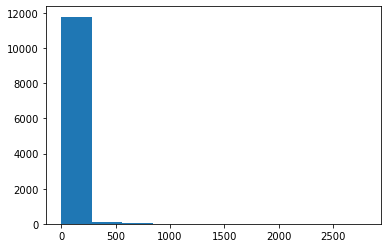

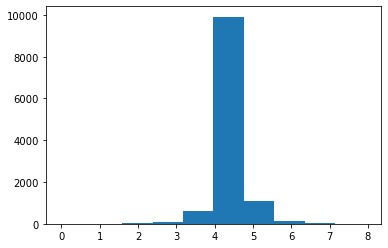

STORIES


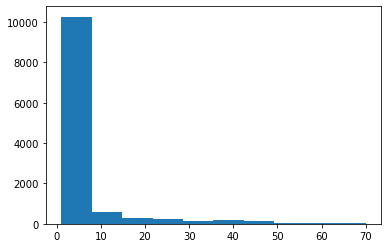

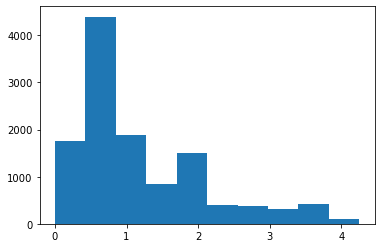

FULLVAL


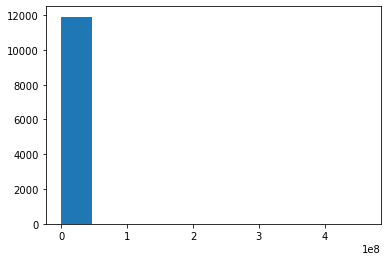

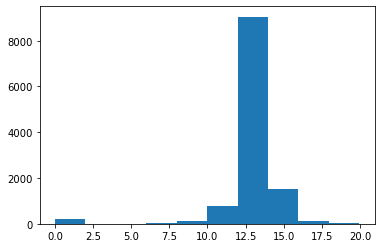

AVLAND


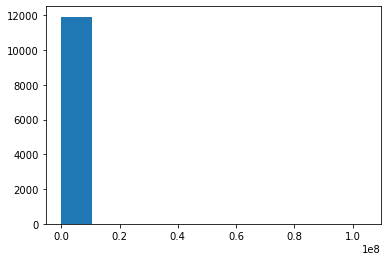

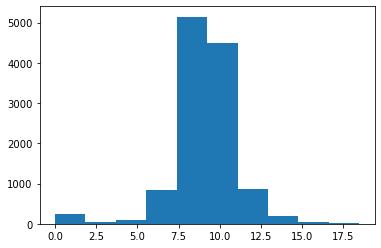

AVTOT


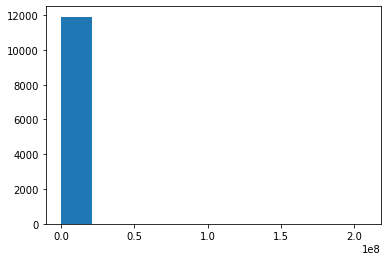

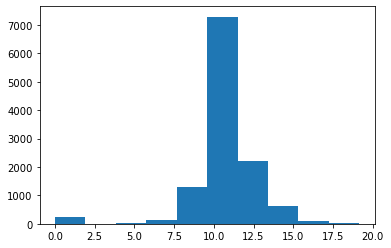

EXLAND


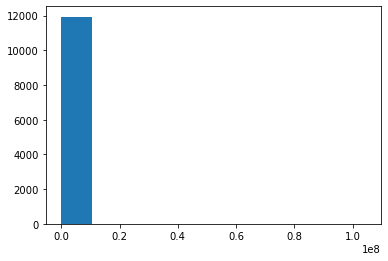

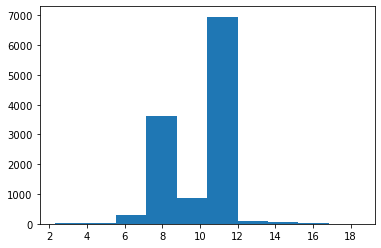

EXTOT


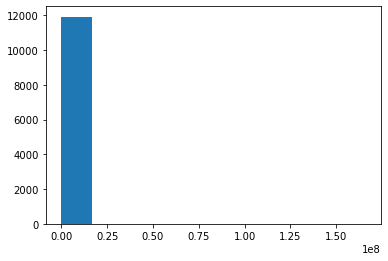

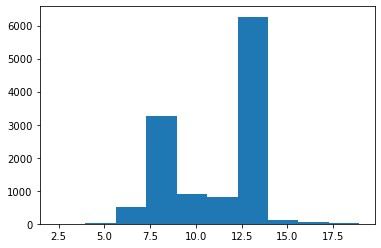

BLDFRONT


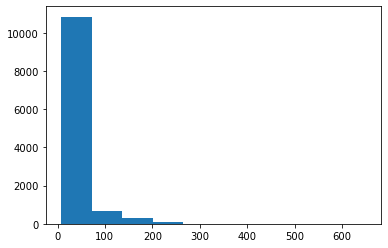

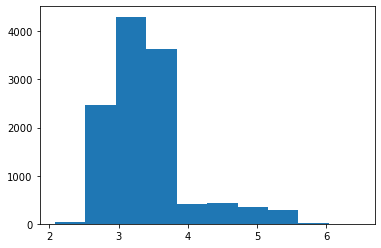

BLDDEPTH


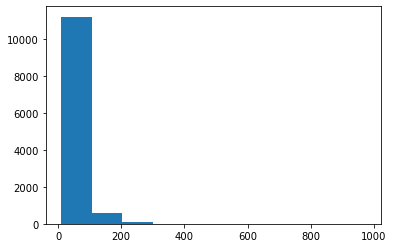

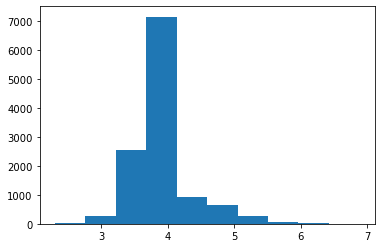

AVLAND2


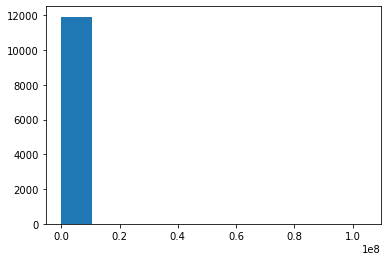

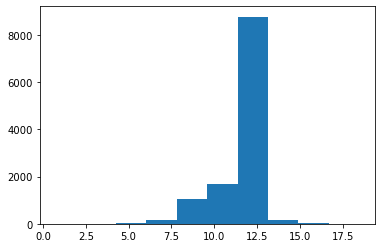

AVTOT2


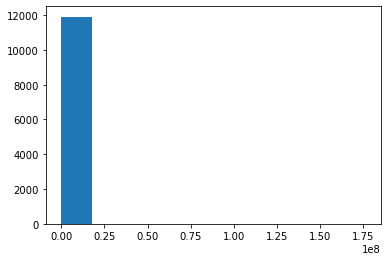

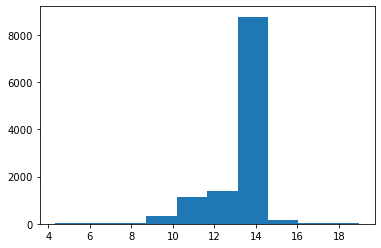

EXLAND2


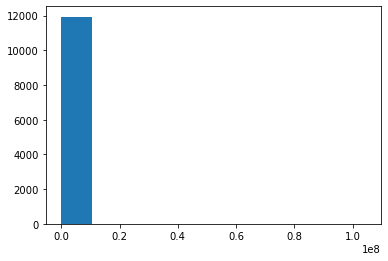

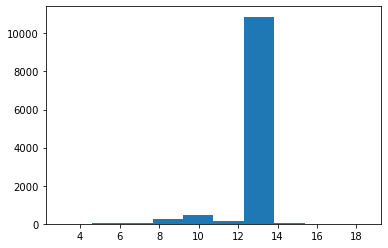

EXTOT2


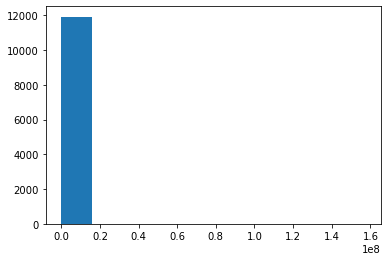

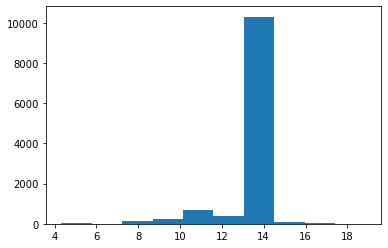

Latitude


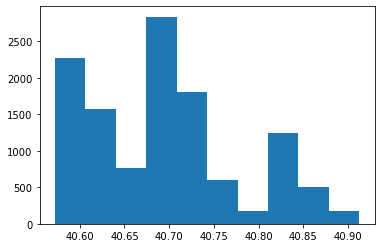

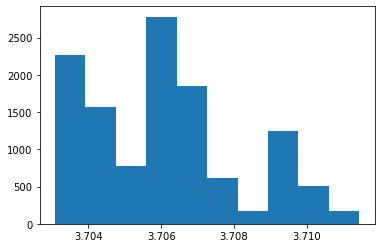

Longitude


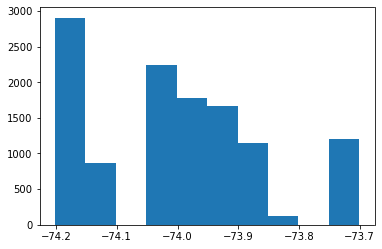

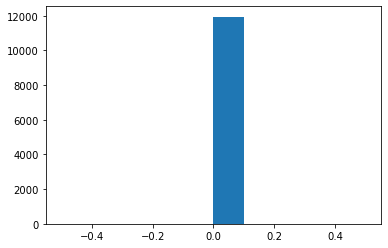

In [24]:
for column in numerical_columns:
    print(column)
    plt.hist(df[column])
    plt.show()
    plt.hist(standarizing.log_scale(df[column]))
    plt.show()

In [25]:
for column in set(numerical_columns).symmetric_difference(['Latitude', 'Longitude']):
    df.loc[:, column] = standarizing.log_scale(df.loc[:, column])

In [26]:
df.head()

,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,...,EXLAND_WAS_NAN,EXTOT_WAS_NAN,BLDFRONT_WAS_NAN,BLDDEPTH_WAS_NAN,AVLAND2_WAS_NAN,AVTOT2_WAS_NAN,EXLAND2_WAS_NAN,EXTOT2_WAS_NAN,Latitude_WAS_NAN,Longitude_WAS_NAN
0,RK,4,3.825094,4.668648,nan_val,1.791759,15.057646,11.678736,14.259138,11.498222,...,1,1,1,1,0,0,1,1,0,0
1,R4,2,3.825094,4.668648,nan_val,3.135494,12.420313,9.758520,11.621807,9.758520,...,0,0,1,1,0,0,0,0,0,0
2,R4,2,3.825094,4.668648,nan_val,3.218876,12.062999,9.332912,11.264490,11.498222,...,1,1,0,0,0,0,1,1,0,0
3,R4,2,3.825094,4.668648,nan_val,3.295837,12.125676,9.552582,11.327174,9.552582,...,0,0,1,1,0,0,0,0,0,0
4,R4,2,3.825094,4.668648,nan_val,2.944439,13.235580,9.222862,12.437073,11.498222,...,1,1,0,0,0,0,1,1,0,0


In [27]:
df.describe()

,LTFRONT,LTDEPTH,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,BLDFRONT,BLDDEPTH,...,EXLAND_WAS_NAN,EXTOT_WAS_NAN,BLDFRONT_WAS_NAN,BLDDEPTH_WAS_NAN,AVLAND2_WAS_NAN,AVTOT2_WAS_NAN,EXLAND2_WAS_NAN,EXTOT2_WAS_NAN,Latitude_WAS_NAN,Longitude_WAS_NAN
count,11946.000000,11946.000000,11946.000000,11946.000000,11946.000000,11946.000000,11946.000000,11946.000000,11946.000000,11946.000000,...,11946.000000,11946.000000,11946.000000,11946.000000,11946.000000,11946.000000,11946.000000,11946.000000,11946.000000,11946.000000
mean,3.468178,4.579584,1.168320,12.856940,9.043747,10.558349,10.009825,10.799201,3.408950,3.949162,...,0.563620,0.498326,0.254478,0.253725,0.684832,0.684832,0.903315,0.850661,0.036330,0.036330
std,0.852428,0.399954,0.917300,2.121408,1.983445,2.102483,1.983465,2.443282,0.592964,0.436211,...,0.495957,0.500018,0.435586,0.435160,0.464602,0.464602,0.295541,0.356437,0.187118,0.187118
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.302585,2.302585,2.079442,2.302585,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.091042,4.605170,0.693147,12.634603,8.471620,9.936148,7.293018,7.803843,2.995732,3.688879,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,3.637586,4.605170,0.693147,13.118355,9.174713,10.336892,11.498222,12.724475,3.258097,3.951244,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,3.825094,4.668648,1.745351,13.478638,9.737979,11.479638,11.498222,12.724475,3.646918,4.063795,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,7.807103,7.937375,4.248495,19.951078,18.464175,19.152570,18.464175,18.927753,6.476972,6.881411,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
df.to_csv('cleaned.csv', index=0)

In [29]:
scaler, scaler_y, df = standarizing.fit_transform_on('cleaned.csv')
standarizing.save_scaler_as(scaler, 'standard_scaler.joblib')
standarizing.save_scaler_as(scaler_y, 'standard_scaler_y.joblib')

In [30]:
df.columns

Index(['BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL',
       'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'BLDFRONT', 'BLDDEPTH',
       'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'YEAR', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'NTA', 'OWNER_RICHNESS', 'BIN_POPULARNESS', 'LTFRONT_WAS_NAN',
       'LTDEPTH_WAS_NAN', 'STORIES_WAS_NAN', 'EXLAND_WAS_NAN', 'EXTOT_WAS_NAN',
       'BLDFRONT_WAS_NAN', 'BLDDEPTH_WAS_NAN', 'AVLAND2_WAS_NAN',
       'AVTOT2_WAS_NAN', 'EXLAND2_WAS_NAN', 'EXTOT2_WAS_NAN',
       'Latitude_WAS_NAN', 'Longitude_WAS_NAN'],
      dtype='object')

In [31]:
df.head()

,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,...,EXLAND_WAS_NAN,EXTOT_WAS_NAN,BLDFRONT_WAS_NAN,BLDDEPTH_WAS_NAN,AVLAND2_WAS_NAN,AVTOT2_WAS_NAN,EXLAND2_WAS_NAN,EXTOT2_WAS_NAN,Latitude_WAS_NAN,Longitude_WAS_NAN
0,RK,4,0.418722,0.222695,nan_val,0.679674,1.037423,1.328547,1.760273,0.750434,...,0.879913,1.003354,1.711609,1.715014,-1.474079,-1.474079,0.327160,0.418994,-0.194164,-0.194164
1,R4,2,0.418722,0.222695,nan_val,2.144616,-0.205828,0.360384,0.505832,-0.126706,...,-1.136476,-0.996657,1.711609,1.715014,-1.474079,-1.474079,-3.056609,-2.386669,-0.194164,-0.194164
2,R4,2,0.418722,0.222695,nan_val,2.235519,-0.374268,0.145795,0.335874,0.750434,...,0.879913,1.003354,-0.584246,-0.583086,-1.474079,-1.474079,0.327160,0.418994,-0.194164,-0.194164
3,R4,2,0.418722,0.222695,nan_val,2.319422,-0.344722,0.256552,0.365690,-0.230537,...,-1.136476,-0.996657,1.711609,1.715014,-1.474079,-1.474079,-3.056609,-2.386669,-0.194164,-0.194164
4,R4,2,0.418722,0.222695,nan_val,1.936328,0.178492,0.090309,0.893611,0.750434,...,0.879913,1.003354,-0.584246,-0.583086,-1.474079,-1.474079,0.327160,0.418994,-0.194164,-0.194164


In [32]:
categorical_cols = ['BLDGCL', 'TAXCLASS', 'EXT', 'YEAR', 'Borough', 'Community Board', 'Council District',
                    'Census Tract', 'NTA', 'OWNER_RICHNESS', 'BIN_POPULARNESS', 'LTFRONT_WAS_NAN',
                    'LTDEPTH_WAS_NAN', 'STORIES_WAS_NAN', 'EXLAND_WAS_NAN', 'EXTOT_WAS_NAN',
                    'BLDFRONT_WAS_NAN', 'BLDDEPTH_WAS_NAN', 'AVLAND2_WAS_NAN',
                    'AVTOT2_WAS_NAN', 'EXLAND2_WAS_NAN', 'EXTOT2_WAS_NAN',
                    'Latitude_WAS_NAN', 'Longitude_WAS_NAN', 'EXCD1'
                   ]

In [33]:
one_hot_encoded = pd.get_dummies(df[categorical_cols])
one_hot_encoded.head()

,LTFRONT_WAS_NAN,LTDEPTH_WAS_NAN,STORIES_WAS_NAN,EXLAND_WAS_NAN,EXTOT_WAS_NAN,BLDFRONT_WAS_NAN,BLDDEPTH_WAS_NAN,AVLAND2_WAS_NAN,AVTOT2_WAS_NAN,EXLAND2_WAS_NAN,...,EXCD1_5101.0category,EXCD1_5110.0category,EXCD1_5112.0category,EXCD1_5113.0category,EXCD1_5114.0category,EXCD1_5118.0category,EXCD1_5130.0category,EXCD1_6800.0category,EXCD1_nancategory,EXCD1_other
0,1.98146,1.798936,-0.251564,0.879913,1.003354,1.711609,1.715014,-1.474079,-1.474079,0.327160,...,0,0,0,0,0,0,0,0,1,0
1,1.98146,1.798936,-0.251564,-1.136476,-0.996657,1.711609,1.715014,-1.474079,-1.474079,-3.056609,...,0,0,0,0,0,0,0,1,0,0
2,1.98146,1.798936,-0.251564,0.879913,1.003354,-0.584246,-0.583086,-1.474079,-1.474079,0.327160,...,0,0,0,0,0,0,0,0,1,0
3,1.98146,1.798936,-0.251564,-1.136476,-0.996657,1.711609,1.715014,-1.474079,-1.474079,-3.056609,...,0,0,0,0,0,0,0,1,0,0
4,1.98146,1.798936,-0.251564,0.879913,1.003354,-0.584246,-0.583086,-1.474079,-1.474079,0.327160,...,0,0,0,0,0,0,0,0,1,0


In [34]:
df = df.drop(columns=categorical_cols)
df = pd.concat([df, one_hot_encoded], axis=1)

In [35]:
df.head()

,LTFRONT,LTDEPTH,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,BLDFRONT,BLDDEPTH,...,EXCD1_5101.0category,EXCD1_5110.0category,EXCD1_5112.0category,EXCD1_5113.0category,EXCD1_5114.0category,EXCD1_5118.0category,EXCD1_5130.0category,EXCD1_6800.0category,EXCD1_nancategory,EXCD1_other
0,0.418722,0.222695,0.679674,1.037423,1.328547,1.760273,0.750434,0.788020,0.401337,0.262802,...,0,0,0,0,0,0,0,0,1,0
1,0.418722,0.222695,2.144616,-0.205828,0.360384,0.505832,-0.126706,0.336695,0.401337,0.262802,...,0,0,0,0,0,0,0,1,0,0
2,0.418722,0.222695,2.235519,-0.374268,0.145795,0.335874,0.750434,0.788020,2.433775,2.747254,...,0,0,0,0,0,0,0,0,1,0
3,0.418722,0.222695,2.319422,-0.344722,0.256552,0.365690,-0.230537,0.216101,0.401337,0.262802,...,0,0,0,0,0,0,0,1,0,0
4,0.418722,0.222695,1.936328,0.178492,0.090309,0.893611,0.750434,0.788020,0.848440,2.105427,...,0,0,0,0,0,0,0,0,1,0


In [36]:
df.to_csv('processed.csv', index=0)

In [37]:
df['LTAREA'] = df['LTDEPTH'] * df['LTFRONT']
df['BLDAREA'] = df['BLDDEPTH'] * df['BLDFRONT']

In [38]:
df.to_csv('processed.csv', index=0)

In [39]:
df.head()

,LTFRONT,LTDEPTH,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,BLDFRONT,BLDDEPTH,...,EXCD1_5112.0category,EXCD1_5113.0category,EXCD1_5114.0category,EXCD1_5118.0category,EXCD1_5130.0category,EXCD1_6800.0category,EXCD1_nancategory,EXCD1_other,LTAREA,BLDAREA
0,0.418722,0.222695,0.679674,1.037423,1.328547,1.760273,0.750434,0.788020,0.401337,0.262802,...,0,0,0,0,0,0,1,0,0.093247,0.105472
1,0.418722,0.222695,2.144616,-0.205828,0.360384,0.505832,-0.126706,0.336695,0.401337,0.262802,...,0,0,0,0,0,1,0,0,0.093247,0.105472
2,0.418722,0.222695,2.235519,-0.374268,0.145795,0.335874,0.750434,0.788020,2.433775,2.747254,...,0,0,0,0,0,0,1,0,0.093247,6.686198
3,0.418722,0.222695,2.319422,-0.344722,0.256552,0.365690,-0.230537,0.216101,0.401337,0.262802,...,0,0,0,0,0,1,0,0,0.093247,0.105472
4,0.418722,0.222695,1.936328,0.178492,0.090309,0.893611,0.750434,0.788020,0.848440,2.105427,...,0,0,0,0,0,0,1,0,0.093247,1.786328


<h1>Klasyfikator</h1>

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [66]:
df = pd.read_csv('processed.csv')
df.head()

,LTFRONT,LTDEPTH,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,BLDFRONT,BLDDEPTH,...,EXCD1_5112.0category,EXCD1_5113.0category,EXCD1_5114.0category,EXCD1_5118.0category,EXCD1_5130.0category,EXCD1_6800.0category,EXCD1_nancategory,EXCD1_other,LTAREA,BLDAREA
0,0.418722,0.222695,0.679674,1.037423,1.328547,1.760273,0.750434,0.788020,0.401337,0.262802,...,0,0,0,0,0,0,1,0,0.093247,0.105472
1,0.418722,0.222695,2.144616,-0.205828,0.360384,0.505832,-0.126706,0.336695,0.401337,0.262802,...,0,0,0,0,0,1,0,0,0.093247,0.105472
2,0.418722,0.222695,2.235519,-0.374268,0.145795,0.335874,0.750434,0.788020,2.433775,2.747254,...,0,0,0,0,0,0,1,0,0.093247,6.686198
3,0.418722,0.222695,2.319422,-0.344722,0.256552,0.365690,-0.230537,0.216101,0.401337,0.262802,...,0,0,0,0,0,1,0,0,0.093247,0.105472
4,0.418722,0.222695,1.936328,0.178492,0.090309,0.893611,0.750434,0.788020,0.848440,2.105427,...,0,0,0,0,0,0,1,0,0.093247,1.786328


<AxesSubplot:>

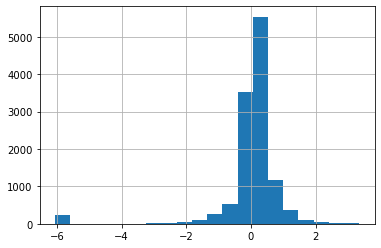

In [67]:
df['FULLVAL'].hist(bins=20)

In [68]:
(df['FULLVAL'] > 1.8).sum()

90

In [69]:
(df['FULLVAL'] < -1.8).sum()

328

In [70]:
df['OUTLIER'] = '0'
df.loc[df['FULLVAL'] > 1.8, 'OUTLIER'] = '1'
df.loc[df['FULLVAL'] < -1.8, 'OUTLIER'] = '-1'

In [71]:
rf_classifier = RandomForestClassifier()

In [72]:
X = df.drop(columns=['FULLVAL', 'OUTLIER'])
y = df['OUTLIER']

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [75]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [78]:
preds = rf_classifier.predict(x_test)

In [80]:
confusion_matrix(y_test, preds)

array([[  86,   10,    0],
       [   0, 3464,    0],
       [   0,    3,   21]], dtype=int64)